In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack, csr_matrix
from sklearn.metrics import pairwise_distances


In [3]:
# Carregando o dataset
df = pd.read_csv('/Users/italolopes/Downloads/spotify.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
# Fazendo uma cópia do DataFrame
df1 = df.copy()
df1.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [6]:
df2 = df.copy()
df2.head()  

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [7]:
df2.shape

(170653, 19)

In [8]:
source = df2['artists']
source.head()

0    ['Sergei Rachmaninoff', 'James Levine', 'Berli...
1                                       ['Dennis Day']
2    ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3                                     ['Frank Parker']
4                                       ['Phil Regan']
Name: artists, dtype: object

In [9]:
df_num = df2.select_dtypes(include=['float64', 'int64']).copy()

In [13]:
# ====== PARTE 1: TF-IDF EM 'artists' ======
artists = df2['artists'].fillna('').astype(str)

vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3, 5),
    lowercase=True
)
X_art = vectorizer.fit_transform(artists)   # matriz esparsa

def recommend_by_artist(name, top_k=10):
    consulta = vectorizer.transform([str(name)])
    similaridades = cosine_similarity(consulta, X_art).ravel()
    indices = np.argsort(similaridades)[::-1]
    recomendacoes = pd.DataFrame({
        'artist': artists.iloc[indices].values,
        'similarity': similaridades[indices]
    })
    recomendacoes = recomendacoes[recomendacoes['artist'].str.lower() != str(name).lower()]
    return recomendacoes.head(top_k).reset_index(drop=True)

# ====== PARTE 2: FEATURES NUMÉRICAS (padroniza SEM centralizar) ======
num_cols = df2.select_dtypes(include=['float64', 'int64']).columns
X_num = df2[num_cols].fillna(0).to_numpy()


scaler = StandardScaler(with_mean=False) 
X_num_scaled = scaler.fit_transform(X_num)        
X_num_scaled = csr_matrix(X_num_scaled)           

# ====== PARTE 3: JUNTANDO TUDO ======
X_comb = hstack([X_num_scaled, X_art], format='csr')

# ====== TESTE RÁPIDO ======
print(recommend_by_artist("anitta", top_k=4))
print("X_comb:", X_comb.shape)
print("X_art:", X_art.shape)
print("X_num:", X_num.shape)

                                              artist  similarity
0                             ['Anitta', 'J Balvin']    0.459565
1               ['Anitta', 'Myke Towers', 'Cardi B']    0.340327
2  ['Dalex', 'Lenny Tavárez', 'Anitta', 'Natti Na...    0.214342
3                                         ['Vanity']    0.146095
X_comb: (170653, 217987)
X_art: (170653, 217972)
X_num: (170653, 15)


In [14]:

X_art.shape

(170653, 217972)

PCA

In [15]:
# Aplicando PCA nos dados de treino e teste
pca = PCA(n_components=100)
X_music_treinamento_pca = pca.fit_transform(X_comb)
x_music_teste_pca = pca.transform(X_comb)
X_music_treinamento_pca.shape, x_music_teste_pca.shape


((170653, 100), (170653, 100))

Passar treino

Melhor número de clusters (k): 2
Melhor Silhouette Score: 0.1935


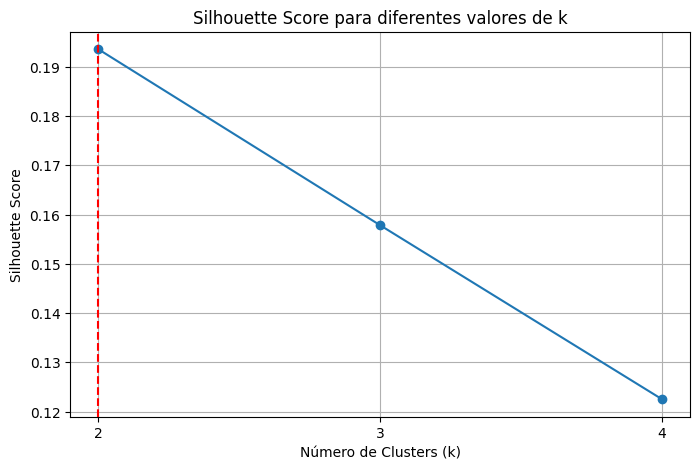

In [25]:
# X_pca -> saída do PCA
X = X_music_treinamento_pca  # Dados já reduzidos pelo PCA
# testar dimensionalidade com outras listas (150mil / 100 / 50)

ks = range(2, 5)  # Testando k de 2 a 10
silhouette_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Melhor K
best_k = ks[np.argmax(silhouette_scores)]
print(f"Melhor número de clusters (k): {best_k}")
print(f"Melhor Silhouette Score: {max(silhouette_scores):.4f}")
# Destacando o melhor ponto

plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, marker='o')

plt.axvline(x=best_k, color='r', linestyle='--', label=f'Melhor k: {best_k}')

plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k')
plt.xticks(ks)
plt.grid()
plt.show()  

In [ ]:
# confrontando o silhouette score com o k escolhido
k_escolhido = n_clusters = 2  # Substitua pelo valor de k escolhido
kmeans = KMeans(n_clusters=k_escolhido, random_state=0, n_init='auto')
kmeans.fit(x_music_teste_pca)
score = silhouette_score(x_music_teste_pca, kmeans.labels_)
print(f"Silhouette Score para k={k_escolhido}: {score:.4f}")

Silhouette Score para k=2: 0.1935


In [ ]:
# ====== RECOMENDAÇÃO POR ARTISTA (K-Means já treinado com k=2) ======
# Use exatamente a mesma base usada no fit do KMeans
X_BASE = x_music_teste_pca
labels = kmeans.fit_predict(X_BASE) # rótulos do modelo já treinado

df_base = df2.copy()

# Função auxiliar para normalizar strings
def _norm(s: str) -> str:
    return str(s).strip().lower()

# Função para encontrar índices do artista
def _indices_do_artista(nome_artista: str):
    """Procura o artista no df2. Tenta tokens 'A, B & C'; se não achar, usa contains()."""
    alvo = _norm(nome_artista)
    idxs_exatos = []
    for i, s in enumerate(df_base["artists"].astype(str)):
        tokens = [ _norm(t) for t in s.replace("&", ",").replace(";", ",").split(",") if t.strip() ]
        if alvo in tokens:
            idxs_exatos.append(i)
    if idxs_exatos:
        return np.array(idxs_exatos, dtype=int)
    mask = df_base["artists"].astype(str).str.lower().str.contains(alvo, na=False)
    return np.where(mask)[0]

# Função principal de recomendação
def recomendar_por_artista(artista: str, top_k: int = 5, metric: str = "euclidean") -> pd.DataFrame:
    """
    1) Calcula o vetor médio do ARTISTA no espaço PCA usado pelo KMeans.
    2) Prediz o cluster desse vetor com kmeans.predict().
    3) Seleciona músicas do MESMO cluster (labels), exclui o próprio artista.
    4) Ordena pela distância ao vetor do artista (mais perto = mais similar).
    """
    idxs = _indices_do_artista(artista)
    if len(idxs) == 0:
        print(f"Artista '{artista}' não encontrado.")
        return pd.DataFrame()

    v_artist = np.nanmean(X_BASE[idxs], axis=0, keepdims=True)
    c = int(kmeans.predict(v_artist)[0])

    mesmos = np.where(labels == c)[0]
    outros = [j for j in mesmos if _norm(df_base.iloc[j]["artists"]) != _norm(artista)]
    if not outros:
        print("Cluster sem outros itens para recomendar.")
        return pd.DataFrame()

# Calcula distâncias e ordena
    dist = pairwise_distances(X_BASE[outros], v_artist, metric=metric).ravel()
    ordem = np.argsort(dist)
    viz = np.array(outros)[ordem][:top_k]

    out = pd.DataFrame({
        "Artista": df_base.iloc[viz]["artists"].values,
        "Música":  df_base.iloc[viz]["name"].values,
        "Cluster": labels[viz],
        "Dist_do_Artista": dist[ordem][:top_k]
    })
    if "year" in df_base.columns:   out["Ano"]    = df_base.iloc[viz]["year"].values
    if "energy" in df_base.columns: out["Energy"] = df_base.iloc[viz]["energy"].values
    return out.reset_index(drop=True)

# ===== Exemplo rápido =====
recomendar_por_artista("Anitta", top_k=5) 

,Artista,Música,Cluster,Dist_do_Artista,Ano,Energy
0,['MAMAMOO'],HIP,1,1.693307,2019,0.731
1,"['Anitta', 'J Balvin']",Downtown,1,1.701765,2017,0.679
2,['Bad Bunny'],25/8,1,1.774208,2020,0.732
3,['Empire of the Sun'],Walking On A Dream,1,1.774324,2008,0.701
4,['Prince Royce'],Darte un Beso,1,1.834999,2013,0.711


In [31]:
recs = recomendar_por_artista("Justin Bieber", top_k=4)
print(recs)

                     Artista                   Música  Cluster  \
0       ['Phillip Phillips']         Gone, Gone, Gone        1   
1  ['Nick Jonas', 'Tove Lo']                    Close        1   
2            ['Demi Lovato']  Give Your Heart a Break        1   
3           ['Justin Moore']           Small Town USA        1   

   Dist_do_Artista   Ano  Energy  
0         1.308513  2013   0.642  
1         1.368648  2016   0.623  
2         1.376295  2011   0.695  
3         1.376595  2009   0.601  


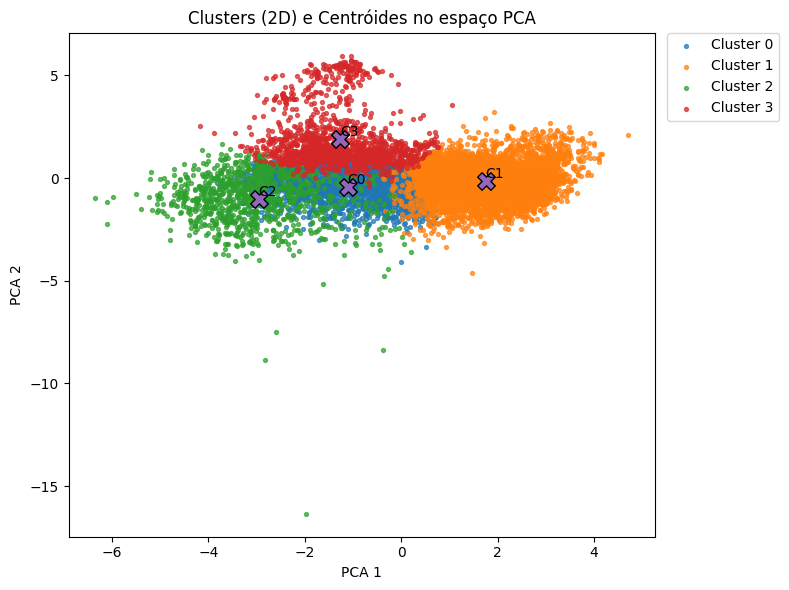

In [ ]:
# ===== Plotagem dos clusters em 2D (PCA) =====
try:
    X_BASE = X
except NameError:
    try:
        X_BASE = x_music_teste_pca
    except NameError:
        X_BASE = X_music_treinamento_pca  # ajuste o nome se for diferente

# ===== Checagens =====
assert 'kmeans' in globals(), "kmeans não encontrado: rode o fit antes."
assert 'labels' in globals(), "labels não encontrado: rode o fit/predict antes."
assert X_BASE.shape[1] >= 2, "São necessárias pelo menos 2 componentes do PCA para o gráfico 2D."

centroids = kmeans.cluster_centers_
k = centroids.shape[0]
n = X_BASE.shape[0]

# ===== Subamostragem opcional para performance =====
max_plot = 8000  # ajuste conforme o tamanho do dataset
if n > max_plot:
    rng = np.random.default_rng(42)
    sample_idx = rng.choice(n, size=max_plot, replace=False)
    Xp = X_BASE[sample_idx, :]
    lp = labels[sample_idx]
else:
    Xp = X_BASE
    lp = labels

# ===== Plot 2D =====
plt.figure(figsize=(8, 6))

# pontos por cluster (cores padrão do matplotlib, sem forçar cor)
for c in np.unique(lp):
    sel = (lp == c)
    plt.scatter(Xp[sel, 0], Xp[sel, 1], s=8, alpha=0.7, label=f'Cluster {int(c)}')

# centróides (marcador destacado)
plt.scatter(centroids[:, 0], centroids[:, 1],
            s=160, marker='X', edgecolor='k', linewidths=1.0)

# rótulos dos centróides
for i in range(k):
    plt.text(centroids[i, 0], centroids[i, 1], f'C{i}', ha='left', va='bottom')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters (2D) e Centróides no espaço PCA')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()